#Assignment 9:

A)
* Plot the consumption profile for July 10th between 8 AM to 9 PM.
* Do the same for the temperature and irradiance profiles in subplots.

B)
* Define new columns in the *Consumption Dataset* each of which represents a time related feature.
You can check on Pandas guidlines for these parameters: hour, dayOfWeek, month, weekOfYear, and define a column calld "*Weekend Flag*" (with value **0: weekday** and **1: weekend**).

#Preparing to read file

PyDrive:

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



# After a specific amount of time Pydrive logs out, the enxt function checks for that and if it has happend trys log in again
# you will not to log in to your account just the first time, the next times it will be automatic, we will use this function later on.
def authorizeIfLoggedOut():
  try:
    file_list_GDrive = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

  except:    
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

Importing modules:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Importing data files:

In [ ]:
# this will just check if we are logged out it logs in
authorizeIfLoggedOut()

file_list_GDrive = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

for file1 in file_list_GDrive:  
    if "EETBS" in file1['title']:
        Folder_ID_Data_Driven_Building_Simulation= file1['id']

print(Folder_ID_Data_Driven_Building_Simulation)

file_list_Data_Driven_Building_Simulation = drive.ListFile({'q': "'%s' in parents and trashed=false" % Folder_ID_Data_Driven_Building_Simulation}).GetList()

for file2 in file_list_Data_Driven_Building_Simulation:  
    if "Data" in file2['title']:
        Folder_ID_Data= file2['id']
        
for file4 in file_list_Data_Driven_Building_Simulation:
  
    if "Figures" in file4['title']:
        Folder_ID_Figures= file4['id']        
        
        
file_list_Data = drive.ListFile({'q': "'%s' in parents and trashed=false" % Folder_ID_Data}).GetList()

for file3 in file_list_Data:  
    if "irradiance_2014_gen.csv" in file3['title']:
        print("irradiance_2014_gen.csv exists")
        ID_irradiance_2014_gen= file3['id']
        file_irradiance_2014_gen = drive.CreateFile({'id': ID_irradiance_2014_gen})
        file_irradiance_2014_gen.GetContentFile('irradiance_2014_gen.csv') 
    if "consumption_5545.csv" in file3['title']:
        print("consumption_5545.csv exists")
        ID_consumption_5545= file3['id']
        file_consumption_5545 = drive.CreateFile({'id': ID_consumption_5545})
        file_consumption_5545.GetContentFile('consumption_5545.csv') 
    if "Austin_weather_2014.csv" in file3['title']:
        print("Austin_weather_2014.csv exists")
        ID_Austin_weather_2014= file3['id']
        file_Austin_weather_2014 = drive.CreateFile({'id': ID_Austin_weather_2014})
        file_Austin_weather_2014.GetContentFile('Austin_weather_2014.csv')

1caB1_U3vNNcNT6p9OE8ue7GbyOAxs2Oj
irradiance_2014_gen.csv exists
consumption_5545.csv exists
Austin_weather_2014.csv exists


In [ ]:
consumptionFileName = "consumption_5545.csv"
weatherFileName = "Austin_weather_2014.csv"
irradianceSourceFileName = "irradiance_2014_gen.csv"

#Part A

##A-1

**.read_csv:** Creating data frame, to access the data in the consumption file:

In [ ]:
DF_consumption = pd.read_csv(consumptionFileName,sep=",",index_col=0)
DF_consumption.head(3)

,air conditioner_5545
2014-01-01 06:00:00,0.0
2014-01-01 07:00:00,0.0
2014-01-01 08:00:00,0.0


**.rename:** Rename the column title:

In [ ]:
DF_consumption = DF_consumption.rename(columns={"air conditioner_5545":"AC load"})
DF_consumption.head(3)

,AC load
2014-01-01 06:00:00,0.0
2014-01-01 07:00:00,0.0
2014-01-01 08:00:00,0.0


**.to_datetime:** As the indices are intercepted as strings, so in order to make Python to act it as a series of time steps, we need to define them as real data and time:

In [ ]:
DF_consumption.index = pd.to_datetime(DF_consumption.index,utc=True)

Plotting the data related to Jul 10th, between 8 AM to 9 PM:

In [ ]:
DF_consumption_jul10 = DF_consumption.loc["2014-07-10 8:00:00":"2014-07-10 21:00:00"]
DF_consumption_jul10.tail(3)

,AC load
2014-07-10 19:00:00+00:00,1799.966667
2014-07-10 20:00:00+00:00,2291.600000
2014-07-10 21:00:00+00:00,2326.200000


Text(0, 0.5, 'Power [W]')

<Figure size 432x288 with 0 Axes>

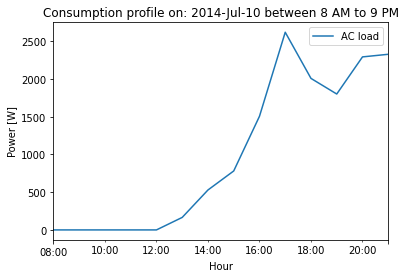

In [ ]:
fig1 = plt.figure()

DF_consumption_jul10.plot()
plt.title("Consumption profile on: 2014-Jul-10 between 8 AM to 9 PM")
plt.xlabel("Hour")
plt.ylabel("Power [W]")

##A-2

###Temperature

**.read_csv**: Converting weather file into data frame:

In [ ]:
DF_weather = pd.read_csv(weatherFileName,sep=";",index_col=0)
DF_weather.head(3)

,latitude,longitude,tz_offset,summary,ozone,ozone_error,temperature,temperature_error,dew_point,dew_point_error,humidity,humidity_error,visibility,visibility_error,apparent_temperature,apparent_temperature_error,pressure,pressure_error,wind_speed,wind_speed_error,cloud_cover,cloud_cover_error,wind_bearing,precip_intensity,precip_intensity_error,precip_probability,precip_type
localhour,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,40.36,NaN,30.12,NaN,0.67,NaN,10.00,NaN,36.89,NaN,1025.10,NaN,5.00,NaN,0.0,NaN,200.0,0.0,NaN,0.0,NaN
2014-01-01 01:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,38.11,NaN,30.46,NaN,0.74,NaN,9.77,NaN,33.79,NaN,1024.50,NaN,5.60,NaN,0.0,NaN,196.0,0.0,NaN,0.0,NaN
2014-01-01 02:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,38.65,NaN,31.92,NaN,0.77,NaN,8.46,NaN,35.80,NaN,1024.03,NaN,3.96,NaN,0.0,NaN,191.0,0.0,NaN,0.0,NaN


**.to_datetime**: Changing the index, to date/time format:

In [ ]:
DF_weather.index = pd.to_datetime(DF_weather.index,utc=True)

Extracting the temperature column and building new, desired, summerized data frame:

In [ ]:
DF_weather.columns

Index(['latitude', 'longitude', 'tz_offset', 'summary', 'ozone', 'ozone_error',
       'temperature', 'temperature_error', 'dew_point', 'dew_point_error',
       'humidity', 'humidity_error', 'visibility', 'visibility_error',
       'apparent_temperature', 'apparent_temperature_error', 'pressure',
       'pressure_error', 'wind_speed', 'wind_speed_error', 'cloud_cover',
       'cloud_cover_error', 'wind_bearing', 'precip_intensity',
       'precip_intensity_error', 'precip_probability', 'precip_type'],
      dtype='object')

In [ ]:
DF_temperature = DF_weather[["temperature"]]
DF_temperature.head(3)

,temperature
localhour,
2014-01-01 06:00:00+00:00,40.36
2014-01-01 07:00:00+00:00,38.11
2014-01-01 08:00:00+00:00,38.65


Extracting the desired period:

In [ ]:
DF_temperature_jul10 = DF_temperature.loc["2014-07-10 8:00:00":"2014-07-10 21:00:00"]
DF_temperature_jul10.head(3)

,temperature
localhour,
2014-07-10 08:00:00+00:00,73.46
2014-07-10 09:00:00+00:00,72.31
2014-07-10 10:00:00+00:00,71.65


###Irradiance

In [ ]:
DF_irradianceSource = pd.read_csv(irradianceSourceFileName,sep=";",index_col=1)
DF_irradianceSource.head(3)

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,bedroom3,bedroom4,bedroom5,car1,clotheswasher1,clotheswasher_dryg1,diningroom1,diningroom2,dishwasher1,disposal1,drye1,dryg1,freezer1,furnace1,furnace2,garage1,garage2,gen,grid,heater1,housefan1,icemaker1,jacuzzi1,kitchen1,kitchen2,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,lights_plugs5,lights_plugs6,livingroom1,livingroom2,microwave1,office1,outsidelights_plugs1,outsidelights_plugs2,oven1,oven2,pool1,pool2,poollight1,poolpump1,pump1,range1,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localhour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,8236,0.303150,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0051,0.0306,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.019717,NaN,NaN,NaN,-0.005967,0.303150,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0036,0.00115,NaN,NaN,NaN,NaN,NaN,NaN,0.075033,0.0079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,8236,0.358567,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.171067,NaN,NaN,NaN,-0.006317,0.358567,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074750,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,8236,0.367283,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.178183,NaN,NaN,NaN,-0.006350,0.367283,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074883,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
DF_irradianceSource.columns

Index(['dataid', 'use', 'air1', 'air2', 'air3', 'airwindowunit1', 'aquarium1',
       'bathroom1', 'bathroom2', 'bedroom1', 'bedroom2', 'bedroom3',
       'bedroom4', 'bedroom5', 'car1', 'clotheswasher1', 'clotheswasher_dryg1',
       'diningroom1', 'diningroom2', 'dishwasher1', 'disposal1', 'drye1',
       'dryg1', 'freezer1', 'furnace1', 'furnace2', 'garage1', 'garage2',
       'gen', 'grid', 'heater1', 'housefan1', 'icemaker1', 'jacuzzi1',
       'kitchen1', 'kitchen2', 'kitchenapp1', 'kitchenapp2', 'lights_plugs1',
       'lights_plugs2', 'lights_plugs3', 'lights_plugs4', 'lights_plugs5',
       'lights_plugs6', 'livingroom1', 'livingroom2', 'microwave1', 'office1',
       'outsidelights_plugs1', 'outsidelights_plugs2', 'oven1', 'oven2',
       'pool1', 'pool2', 'poollight1', 'poolpump1', 'pump1', 'range1',
       'refrigerator1', 'refrigerator2', 'security1', 'shed1', 'sprinkler1',
       'utilityroom1', 'venthood1', 'waterheater1', 'waterheater2',
       'winecooler1'],
      dty

In [ ]:
DF_irradiance = DF_irradianceSource[["gen"]]
DF_irradiance.head(3)

,gen
localhour,
2014-01-01 00:00:00,-0.005967
2014-01-01 01:00:00,-0.006317
2014-01-01 02:00:00,-0.006350


In [ ]:
DF_irradiance.index = pd.to_datetime(DF_irradiance.index,utc=True)

As irradiance data are negative for some hours, due to the error of measuring instrument, we want to make Pythin to transform them to 0, using boolean values:

In [ ]:
i = DF_irradiance["gen"] < 0
DF_irradiance[i] = 0
DF_irradiance.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3063: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,gen
localhour,
2014-01-01 00:00:00+00:00,0.000000
2014-01-01 01:00:00+00:00,0.000000
2014-01-01 02:00:00+00:00,0.000000
2014-01-01 03:00:00+00:00,0.000000
2014-01-01 04:00:00+00:00,0.000000
2014-01-01 05:00:00+00:00,0.000000
2014-01-01 06:00:00+00:00,0.000000
2014-01-01 07:00:00+00:00,0.052800
2014-01-01 08:00:00+00:00,0.773583


In [ ]:
DF_irradiance_jul10 = DF_irradiance.loc["2014-07-10 08:00:00":"2014-07-10 21:00:00"]
DF_irradiance_jul10.head(3)

,gen
localhour,
2014-07-10 08:00:00+00:00,0.682033
2014-07-10 09:00:00+00:00,1.297933
2014-07-10 10:00:00+00:00,2.555600


###Subplots

Text(0, 0.5, 'Irradiance [W/m^2]')

<Figure size 432x288 with 0 Axes>

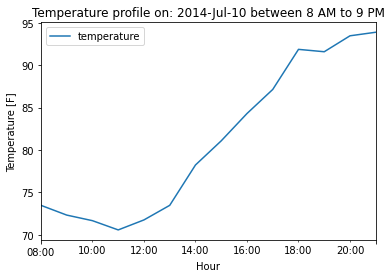

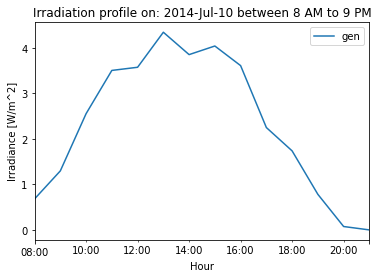

In [ ]:
fig2 = plt.figure()

#plt.subplot(1,2,1)
#plt.plot(DF_temperature_jul10)
DF_temperature_jul10.plot()
plt.title("Temperature profile on: 2014-Jul-10 between 8 AM to 9 PM")
plt.xlabel("Hour")
plt.ylabel("Temperature [F]")

#plt.subplot(1,2,2)
#plt.plot(DF_irradiance_jul10)
DF_irradiance_jul10.plot()
plt.title("Irradiation profile on: 2014-Jul-10 between 8 AM to 9 PM")
plt.xlabel("Hour")
plt.ylabel("Irradiance [W/m^2]")

#Part B

Adding "Hour" column:

In [ ]:
DF_consumption["Hour"] = DF_consumption.index.hour
DF_consumption.head(3)

,AC load,Hour
2014-01-01 06:00:00+00:00,0.0,6
2014-01-01 07:00:00+00:00,0.0,7
2014-01-01 08:00:00+00:00,0.0,8


Adding "Day of Week" column:

In [ ]:
DF_consumption["Day of Week"] = DF_consumption.index.dayofweek
DF_consumption.head(3)

,AC load,Hour,Day of Week
2014-01-01 06:00:00+00:00,0.0,6,2
2014-01-01 07:00:00+00:00,0.0,7,2
2014-01-01 08:00:00+00:00,0.0,8,2


Adding "Month" column:

In [ ]:
DF_consumption["Month"] = DF_consumption.index.month
DF_consumption.head(3)

,AC load,Hour,Day of Week,Month
2014-01-01 06:00:00+00:00,0.0,6,2,1
2014-01-01 07:00:00+00:00,0.0,7,2,1
2014-01-01 08:00:00+00:00,0.0,8,2,1


Adding "Week of Year" column:

In [ ]:
DF_consumption["Week of Year"] = DF_consumption.index.weekofyear
DF_consumption.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


,AC load,Hour,Day of Week,Month,Week of Year
2014-01-01 06:00:00+00:00,0.0,6,2,1,1
2014-01-01 07:00:00+00:00,0.0,7,2,1,1
2014-01-01 08:00:00+00:00,0.0,8,2,1,1


Adding "Weekend Flag": For this, we need to use boolean values based on "Day of Week" column:

In [ ]:
DF_consumption["Weekend Flag"] = 0
DF_consumption.head(3)

,AC load,Hour,Day of Week,Month,Week of Year,Weekend Flag
2014-01-01 06:00:00+00:00,0.0,6,2,1,1,0
2014-01-01 07:00:00+00:00,0.0,7,2,1,1,0
2014-01-01 08:00:00+00:00,0.0,8,2,1,1,0


Extracting the weekend days in a boolean serie:

In [ ]:
DF_consumption.loc[:,"Day of Week"] == 0

2014-01-01 06:00:00+00:00    False
2014-01-01 07:00:00+00:00    False
2014-01-01 08:00:00+00:00    False
2014-01-01 09:00:00+00:00    False
2014-01-01 10:00:00+00:00    False
                             ...  
2014-12-31 01:00:00+00:00    False
2014-12-31 02:00:00+00:00    False
2014-12-31 03:00:00+00:00    False
2014-12-31 04:00:00+00:00    False
2014-12-31 05:00:00+00:00    False
Name: Day of Week, Length: 8736, dtype: bool

Updating the created "Weekend Flag" column:

In [ ]:
#IDEA1
DF_consumption.loc[:,"Weekend Flag"] = (DF_consumption.loc[:,"Day of Week"] == 0)*1
DF_consumption.loc["2014-01-06 07:00:00"]

#IDEA 2
#DF_consumption.loc[(DF_consumption.loc[:,"Day of Week"] == 0),"Weekend Flag"] = 1
#DF_consumption.loc["2014-01-06 07:00:00"]

AC load         0.0
Hour            7.0
Day of Week     0.0
Month           1.0
Week of Year    2.0
Weekend Flag    1.0
Name: 2014-01-06 07:00:00+00:00, dtype: float64